In [ ]:
import pandas as pd
import nltk

In [ ]:
data=pd.read_csv('fcr.csv')
data

,Column1,Column2
0,@jay.vachhani\r\nI added TODO comments on my M...,System Generated
1,@sy I added the re SA Sign in Logic please rev...,System Generated
2,Abandoned,System Generated
3,Abandoned\r\n\r\nCherry-picked to devel/heartw...,System Generated
4,Abandoned\r\n\r\nmerge conflct,System Generated
5,Abandoned\r\n\r\nNeed to change code,System Generated
6,Abandoned\r\n\r\nNo need this cl. Identical cl...,System Generated
7,add copyright,System Generated
8,added 1 commit\r\n\r\n<ul><li>012c2032 - No al...,System Generated
9,added 1 commit\r\n\r\n<ul><li>014e9a30 - fix s...,System Generated


In [ ]:
headers=["text","target"]
data.columns=headers
len(data)

15523

In [ ]:
data['target'].value_counts()

System Generated    4408
SomeHowEfficient    3785
Efficient           3680
Not Efficient       3650
Name: target, dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [ ]:
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        stop_words = set(stopwords.words('english'))
        review=[lemma.lemmatize(w,pos ='v') for w in word_tokenize(str(review).lower())]
       
        review =[w for w in word_tokenize(str(review).lower()) if w not in stop_words]
        review=' '.join(review)
        review=re.sub('[^a-zA-Z]',' ',review)
        review = re.sub('[0-9]+', '', review)
        review = re.sub(r'[?|!|\'|"|#]',r'',review)
        review = re.sub(r'[.|,|)|(|\|/]',r' ',review)
        review = re.sub(r'http\S+', '', review, flags=re.MULTILINE)
        
        review = ''.join([c for c in review if c not in punctuation])
        review_corpus.append(review)
        review = nltk.pos_tag(review)
    return review_corpus

In [ ]:
data['clean_text']=clean_review(data.text.values)

In [ ]:
data.drop(['text'], axis=1, inplace=True)
data

,target,clean_text
0,System Generated,jay vachhani add to...
1,System Generated,sy add the re ...
2,System Generated,abandon
3,System Generated,abandon cherry picked to dev...
4,System Generated,abandon merge conflct
5,System Generated,abandon need to change ...
6,System Generated,abandon no need this cl...
7,System Generated,add copyright
8,System Generated,add commit ul ...
9,System Generated,add commit ul ...


In [ ]:
x= data.iloc[:,1].values
y= data.iloc[:,0].values


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y[:,] = labelencoder_y.fit_transform(y[:,])

In [ ]:
y=y.astype("int")
y.reshape(-1,1)
type(y)
data['target'].value_counts()

3    4408
2    3785
0    3680
1    3650
Name: target, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word', ngram_range=(1,3), stop_words = "english", lowercase = True,
                          max_features = 50000)

In [ ]:
x=tfidf.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors =3 ,metric="minkowski" , p= 2)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
from sklearn.svm import SVC
classifierSVM=SVC(kernel='linear')
from sklearn.naive_bayes import GaussianNB
classifierG = GaussianNB()
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
from sklearn.ensemble import RandomForestRegressor
regressorR = RandomForestRegressor(n_estimators = 60, random_state = 1234)
from sklearn.linear_model import SGDClassifier
clfSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pre=cross_val_predict(LogisticRegression(),x,y,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y, y_pre)
cm

0.7915995619403465

In [ ]:
y_preKNN=cross_val_predict(classifierKNN,x,y,cv=5)

In [ ]:
cmKNN = accuracy_score(y, y_preKNN)
cmKNN

0.5908651678154996

In [ ]:
y_preMN=cross_val_predict(nb,x,y,cv=5)

In [ ]:
cmMN = accuracy_score(y, y_preMN)
cmMN

0.7859949751980931

In [ ]:
y_preSVM=cross_val_predict(classifierSVM,x,y,cv=5)


In [ ]:
cmSVM = accuracy_score(y, y_preSVM)
cmSVM

0.7977839335180056

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, x ,y).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-7.232565468292897

In [ ]:
y_prebnb=cross_val_predict(bnb,x,y,cv=5)

In [ ]:
cmbnb = accuracy_score(y, y_prebnb)
cmbnb

0.6718417831604716

In [ ]:
y_preSGD=cross_val_predict(clfSGD,x,y,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [ ]:
cmSGD = accuracy_score(y, y_preSGD)
cmSGD

0.7881208529279135

In [ ]:
print("Accuracy of Logistic Regressor :",cm*100)
print("Accuracy of KNN :",cmKNN*100)
print("Accuracy of Multinominal :",cmMN*100)
print("Accuracy of SVM :",cmSVM*100)
print("Accuracy of BernoulliNB :",cmbnb*100)
print("Accuracy of SGD :",cmSGD*100)


Accuracy of Logistic Regressor : 79.15995619403465
Accuracy of KNN : 59.08651678154996
Accuracy of Multinominal : 78.59949751980932
Accuracy of SVM : 79.77839335180056
Accuracy of BernoulliNB : 67.18417831604717
Accuracy of SGD : 78.81208529279135


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y, y_preSVM))
print(classification_report(y, y_preSVM))

[[3301  161  205   13]
 [ 924 2716    7    3]
 [ 950  247 2584    4]
 [ 406    6  213 3783]]
              precision    recall  f1-score   support

           0       0.59      0.90      0.71      3680
           1       0.87      0.74      0.80      3650
           2       0.86      0.68      0.76      3785
           3       0.99      0.86      0.92      4408

   micro avg       0.80      0.80      0.80     15523
   macro avg       0.83      0.80      0.80     15523
weighted avg       0.84      0.80      0.80     15523



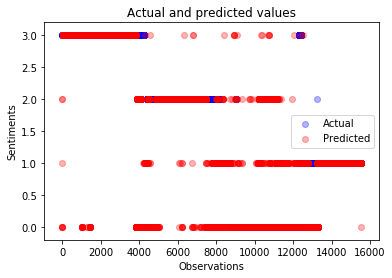

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y.size), y=y, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_preSVM.size), y=y_preSVM, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Sentiments')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)


In [ ]:
classifierSVM.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_preS=classifierSVM.predict(X_test)


In [ ]:
cmS = accuracy_score(y_test, y_preS)
cmS

0.9571658615136877

<IPython.core.display.Javascript object>


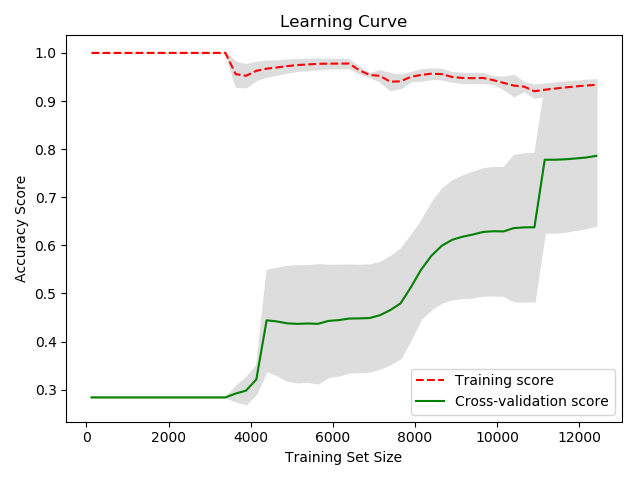

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib notebook 
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve( nb, 
                                                        x, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0,50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
data['target'].value_counts()

3    4408
2    3785
0    3680
1    3650
Name: target, dtype: int64